In [35]:
import pandas as pd
import os
from matplotlib import pyplot as plt
print(os.getcwd())
data = pd.read_csv('../../Data/Raw/dataset.csv')
print(len(data))

/Users/kesjony1/Technion/ThirdYear/Statistics2/Statistics2-Project/notebooks/EDA
4424


In [36]:
print(data.head())

   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation        

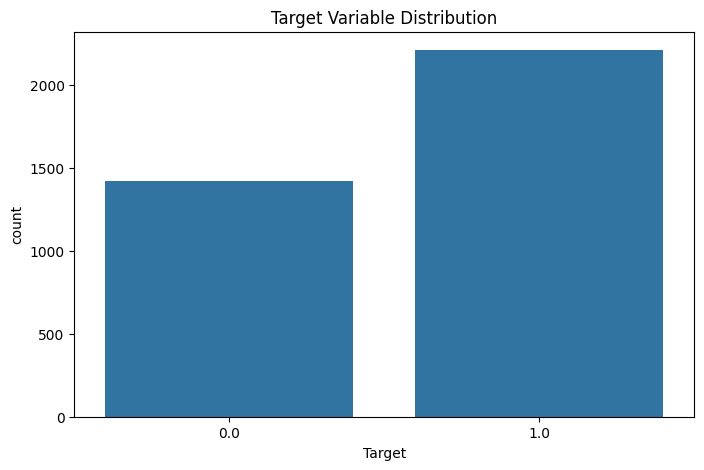

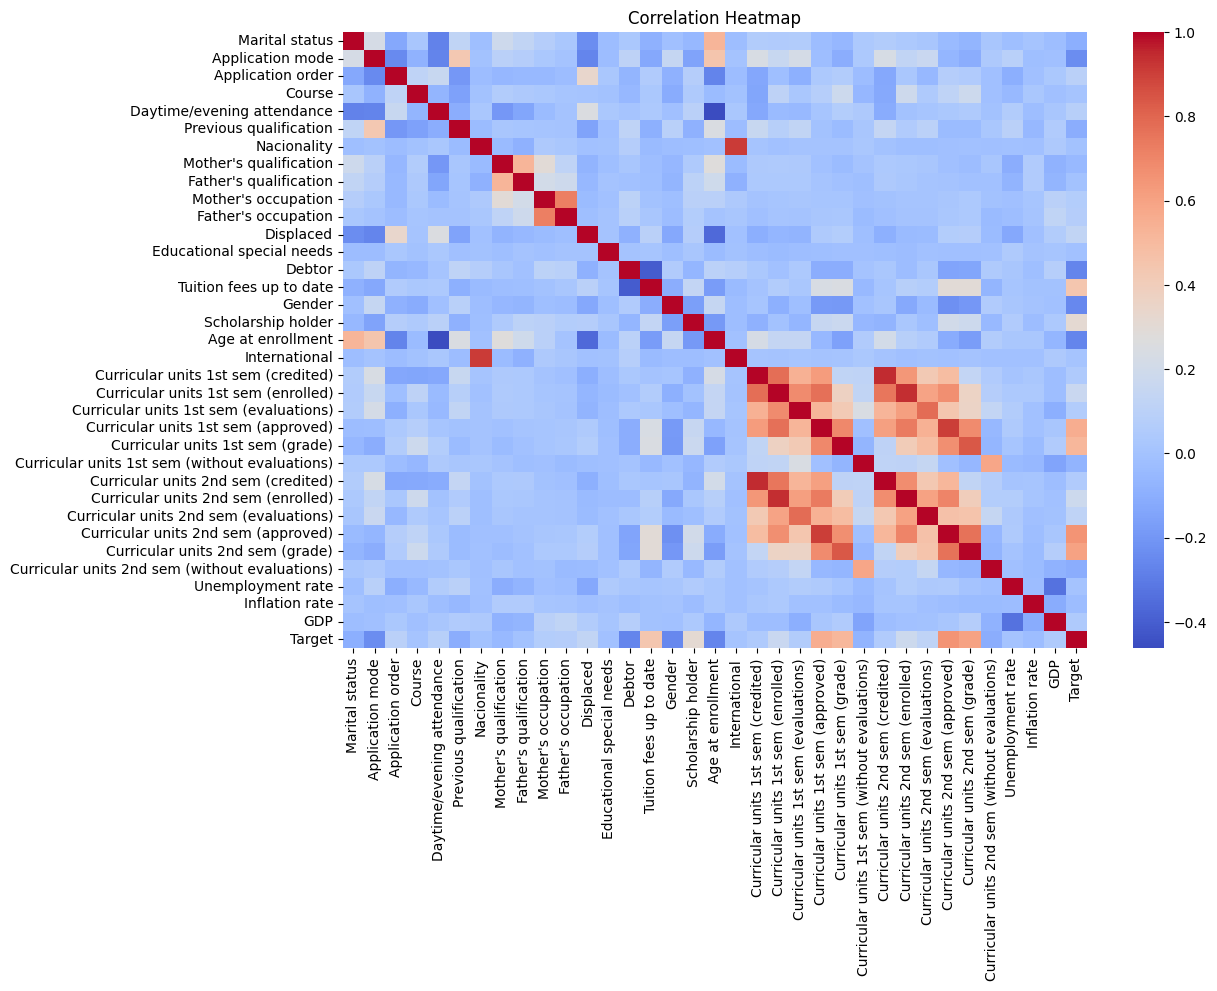

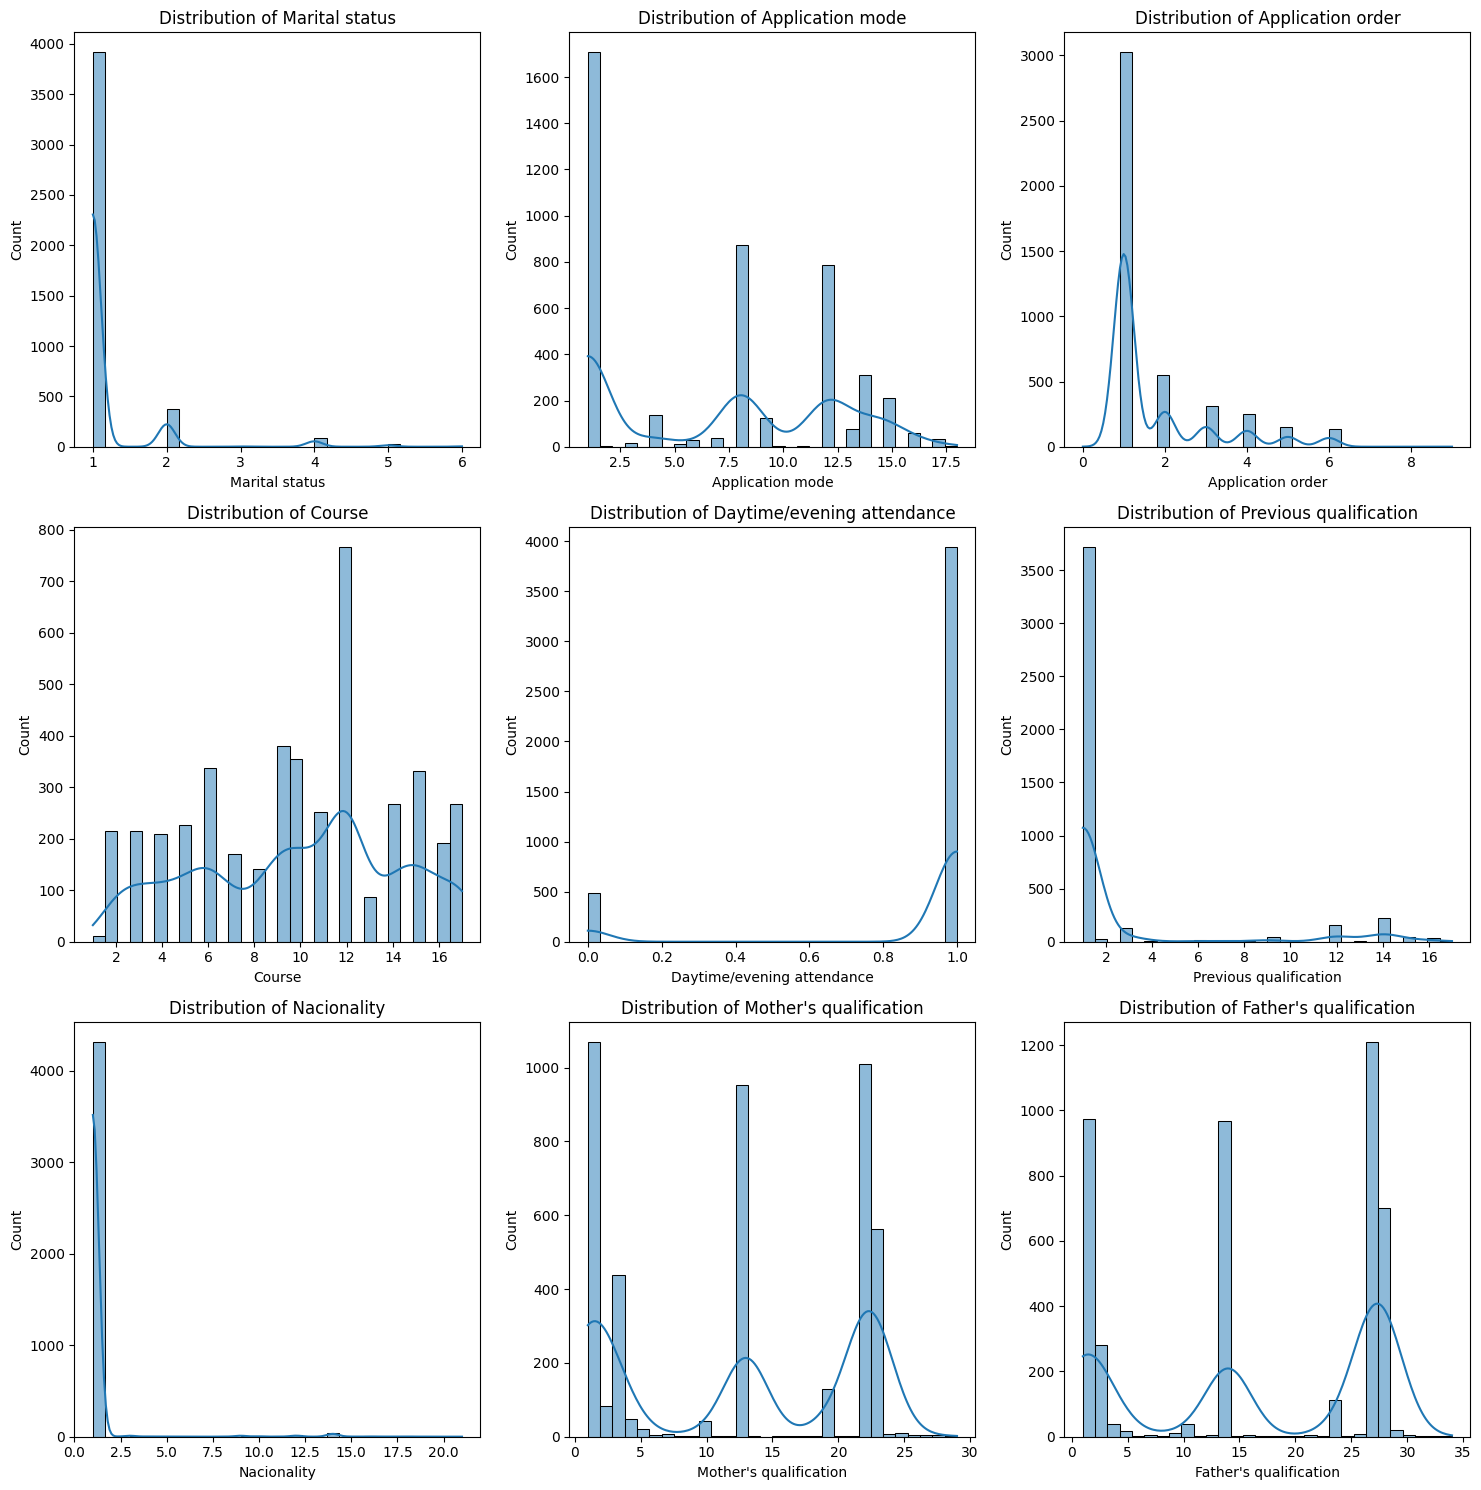

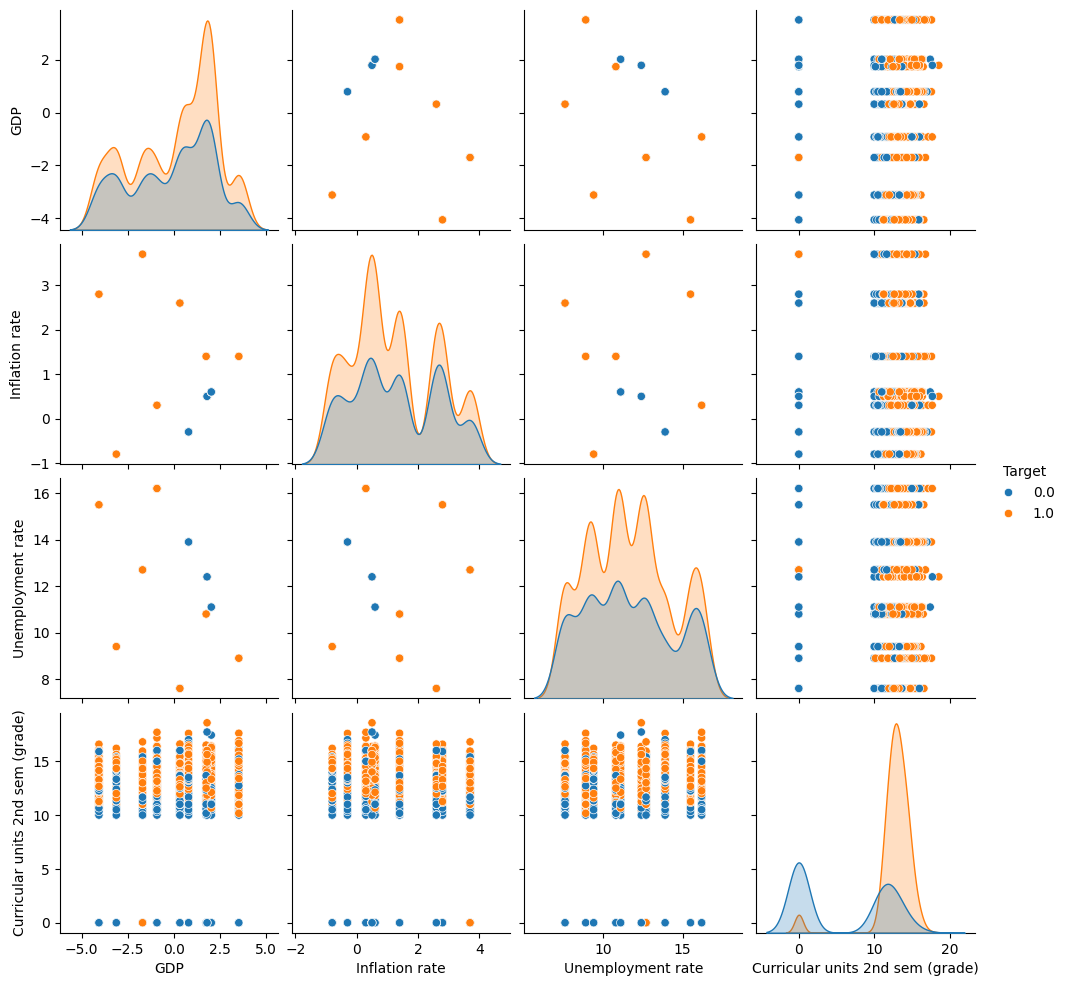

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../../Data/Raw/dataset.csv')

# Convert categorical 'Target' to numeric for analysis (e.g., Dropout: 0, Graduate: 1)
data['Target'] = data['Target'].map({'Dropout': 0, 'Graduate': 1})

# Basic information
print("Dataset Info:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Target variable distribution
print("\nTarget Variable Distribution:")
print(data['Target'].value_counts())

# Visualize Target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Target')
plt.title('Target Variable Distribution')
plt.show()

# Correlation matrix (numeric columns only)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualize numeric variables
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_columns[:9]):  # Adjust the range to visualize more columns
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Pairplot for selected variables
selected_cols = ['GDP', 'Inflation rate', 'Unemployment rate', 'Curricular units 2nd sem (grade)', 'Target']
sns.pairplot(data[selected_cols], hue='Target', diag_kind='kde')
plt.show()

# Visualize categorical variables
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
